In [1]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 12})
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
def index(i,j):
    if i==0: return 0
    if i==1 and j==0: return 0
    if i==1 and j==1: return 1
    if i==2 and j==0: return 1
    if i==2 and j==1: return 0
    if i==3: return 1    

In [3]:
def makePlots(data,variable,label,upperLimits,outputFName):
    activities = [
                  "EVNT merging",
                  "Full simulation",
                  "Fast simulation",
                  "HITS merging",
                  "DigiReco",
                  "RAWtoESD->AOD,perfDPD",
                  "AOD/HISTMerge, DRAW/DESD",
                  "Derivation"]
    f, axarr = plt.subplots(2, 2, figsize=(15,15))
    num_bins = 150
    i = 0
    for activity in activities:
        x = np.asarray(data[(activity,variable)])
        axarr[index(i,0), index(i,1)].hist(x, num_bins, alpha=0.5, label=activity,range=[0.0, upperLimits[i]])
        #axarr[index(i,0), index(i,1)].set_yscale("log")
        axarr[index(i,0), index(i,1)].legend(loc='upper right')
        if activity in ["EVNT merging","HITS merging","AOD/HISTMerge, DRAW/DESD"]: i+=1
    f.text(0.5, 0.04, label, ha='center')
    f.text(0.04, 0.5, 'Jobs', va='center', rotation='vertical')
    plt.show()
    f.savefig(outputFName,bbox_inches='tight')
    return

In [4]:
# Read in saved file
#data = pickle.load(open("io_test.p","rb"))
data = pickle.load(open("io_test.p","rb"))

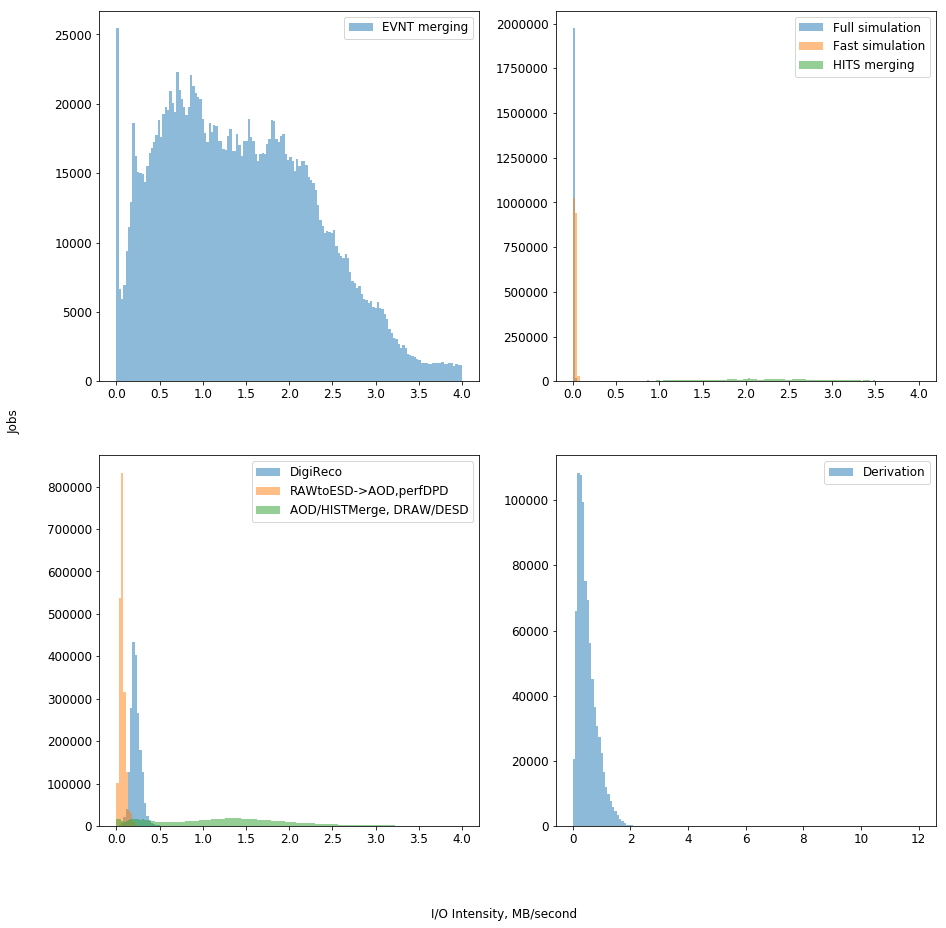

In [5]:
# Plot: I/O intensity
makePlots(data,"I/O intensity","I/O Intensity, MB/second",[4.0,4.0,4.0,12.0],"ioIntensity.pdf")

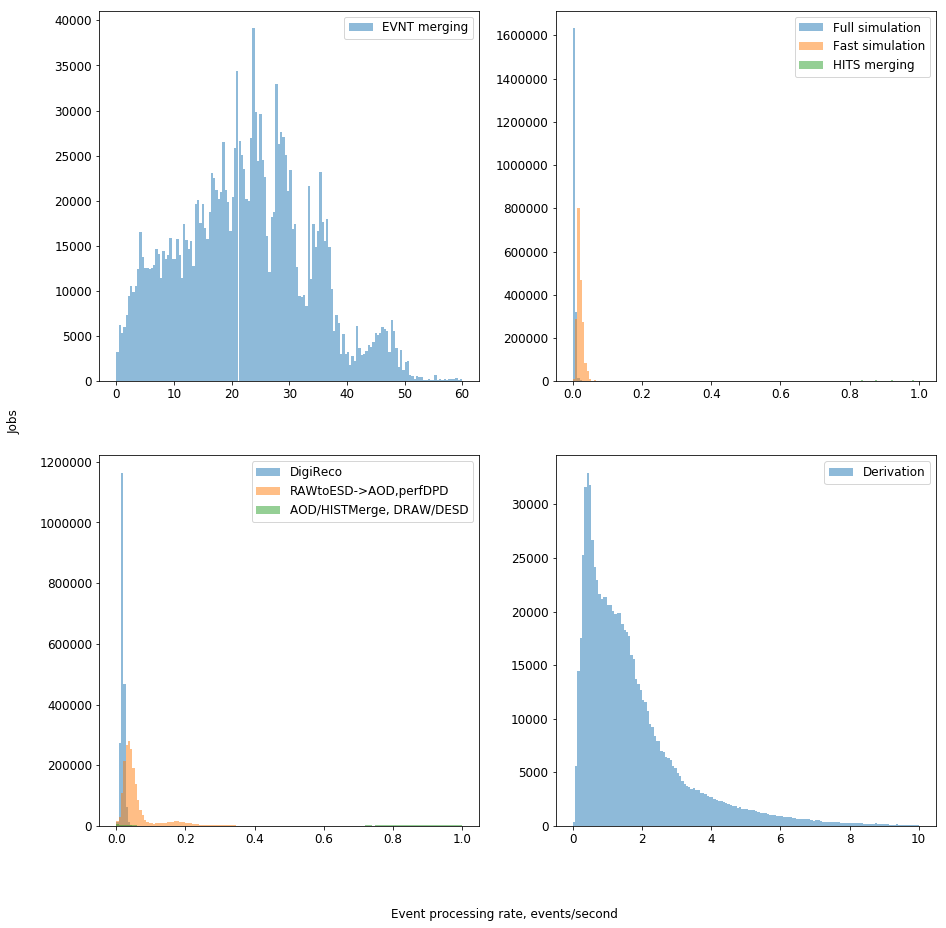

In [6]:
# Plot: Event rate
makePlots(data,"Event rate","Event processing rate, events/second",[60.0,1.0,1.0,10.0],"eventRate.pdf")

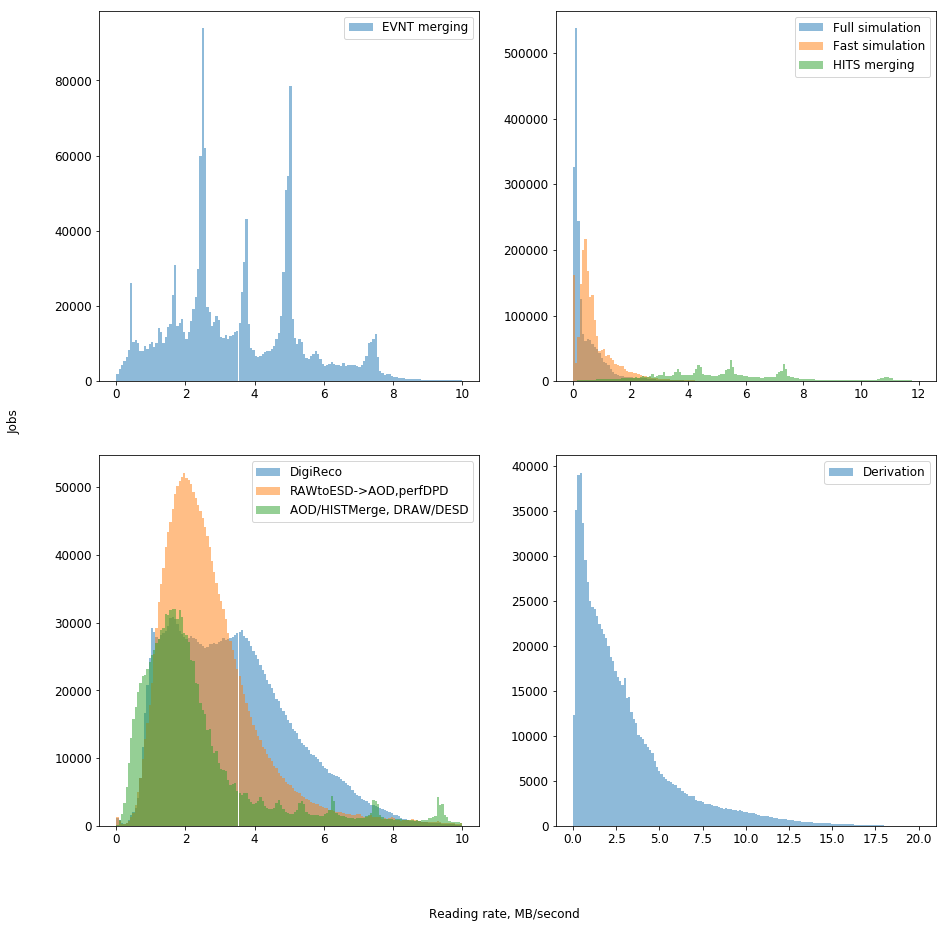

In [11]:
# Plot: Reading rate
makePlots(data,"IObytesReadRate","Reading rate, MB/second",[10.0,12.0,10.0,20.0],"IObytesReadRate.jpg")

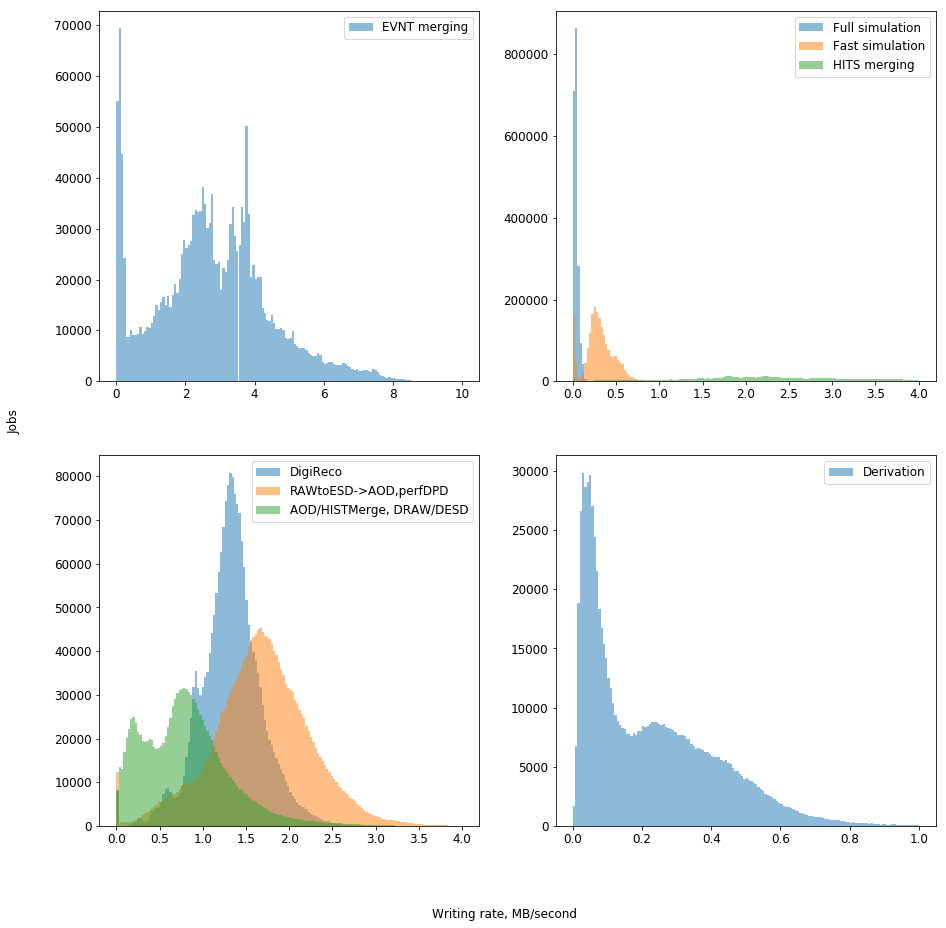

In [13]:
# Plot: Writing rate
makePlots(data,"IObytesWriteRate","Writing rate, MB/second",[10.0,4.0,4.0,1.0],"IObytesWriteRate.jpg")